In [1]:
import yfinance as yf

# Extract Tesla stock data for the past 1 year
tesla_data = yf.download('TSLA', period='1y')

# Display the first few rows of the data
print(tesla_data.head())


[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker            TSLA        TSLA        TSLA        TSLA        TSLA   
Date                                                                     
2023-12-19  257.220001  257.220001  258.339996  253.009995  253.479996   
2023-12-20  247.139999  247.139999  259.839996  247.000000  256.410004   
2023-12-21  254.500000  254.500000  254.800003  248.550003  251.899994   
2023-12-22  252.539993  252.539993  258.220001  251.369995  256.760010   
2023-12-26  256.609985  256.609985  257.970001  252.910004  254.490005   

Price          Volume  
Ticker           TSLA  
Date                   
2023-12-19  106737400  
2023-12-20  125097000  
2023-12-21  109594200  
2023-12-22   93249800  
2023-12-26   86892400  


In [3]:
import yfinance as yf

# Extract GME stock data for the past 1 year
gme_data = yf.download('GME', period='1y')

# Reset the index to make the date a regular column
gme_data_reset = gme_data.reset_index()

# Save the dataframe to a CSV file
gme_data_reset.to_csv('gme_stock_data.csv', index=False)

# Display the first 5 rows of the dataframe
print(gme_data_reset.head())


[*********************100%***********************]  1 of 1 completed

Price        Date  Adj Close      Close       High        Low       Open  \
Ticker                   GME        GME        GME        GME        GME   
0      2023-12-19  17.719999  17.719999  18.590000  17.230000  17.889999   
1      2023-12-20  16.930000  16.930000  18.379999  16.889999  17.530001   
2      2023-12-21  16.980000  16.980000  17.340000  16.590000  17.190001   
3      2023-12-22  16.969999  16.969999  17.200001  16.450001  16.780001   
4      2023-12-26  17.360001  17.360001  17.410000  16.820000  16.980000   

Price    Volume  
Ticker      GME  
0       5447100  
1       5553000  
2       3975300  
3       3325100  
4       3079600  


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL for Tesla's revenue data (example from Macrotrends)
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'

# Send a request to the website
response = requests.get(url)

# Parse the page content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Try finding all tables to identify the one with Tesla's revenue data
tables = soup.find_all('table')

# Assuming the first table contains Tesla's revenue data
revenue_table = tables[0]

# Extract headers and rows from the table
headers = [header.text.strip() for header in revenue_table.find_all('th')]
rows = []

for row in revenue_table.find_all('tr')[1:]:  # Skip the header row
    cells = row.find_all('td')
    if len(cells) > 1:
        rows.append([cell.text.strip() for cell in cells])

# Convert the extracted data into a pandas DataFrame
tesla_revenue = pd.DataFrame(rows, columns=headers)

# Display the last 5 rows of the DataFrame
print(tesla_revenue.tail())


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Specify the URL to scrape
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table containing the revenue data
# table = soup.find('table', {'class': 'historical_data_table'})
table = soup.find('table', {'class': 'new_table_class'})

# Extract the table headers
headers = [header.text.strip() for header in table.find_all('th')]

# Extract the table rows
rows = []
for row in table.find_all('tr')[1:]:  # Skip the header row
    data = [cell.text.strip() for cell in row.find_all('td')]
    rows.append(data)

# Create a DataFrame from the extracted data
gme_revenue = pd.DataFrame(rows, columns=headers)

# Remove commas and dollar signs from the 'Revenue' column
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',', '', regex=False).str.replace('$', '', regex=False)

# Display the last five rows
print(gme_revenue.tail())

        Date   Revenue
-  2023-03-31   5.92B
-  2022-12-31   5.20B
-  2022-09-30   6.20B
-  2022-06-30   5.25B
-  2022-03-31   5.47B


[*********************100%***********************]  1 of 1 completed


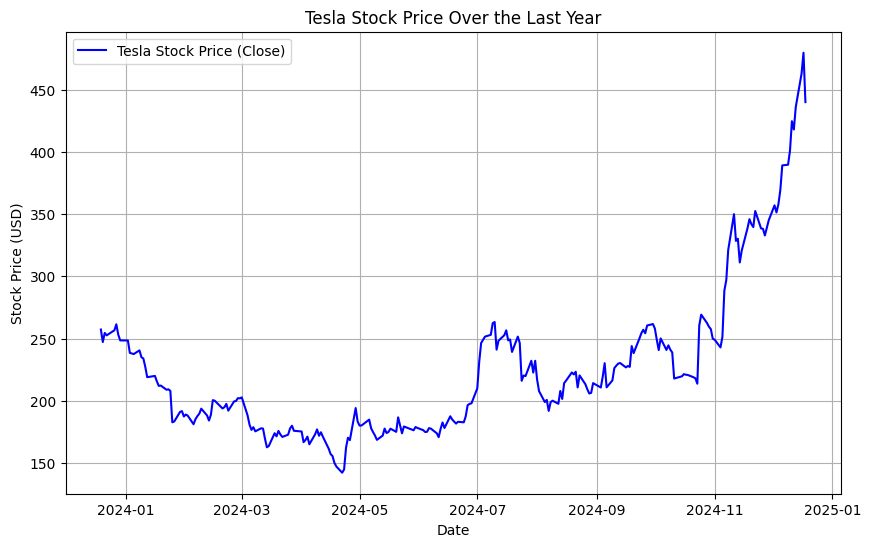

In [8]:
import yfinance as yf
import matplotlib.pyplot as plt

# Function to make the graph
def make_graph(data, title):
    # Plot the closing price
    plt.figure(figsize=(10, 6))
    plt.plot(data['Close'], label='Tesla Stock Price (Close)', color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Extract Tesla stock data for the past 1 year
tesla_data = yf.download('TSLA', period='1y')

# Call the make_graph function to plot Tesla's stock price
make_graph(tesla_data, 'Tesla Stock Price Over the Last Year')


[*********************100%***********************]  1 of 1 completed


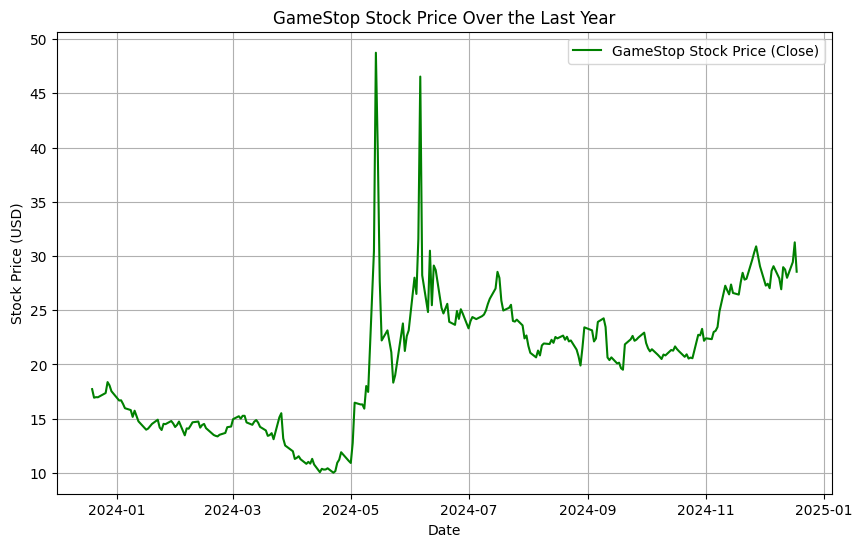

In [9]:
import yfinance as yf
import matplotlib.pyplot as plt

# Function to make the graph
def make_graph(data, title):
    # Plot the closing price
    plt.figure(figsize=(10, 6))
    plt.plot(data['Close'], label='GameStop Stock Price (Close)', color='green')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Extract GameStop stock data for the past 1 year
gme_data = yf.download('GME', period='1y')

# Call the make_graph function to plot GameStop's stock price
make_graph(gme_data, 'GameStop Stock Price Over the Last Year')
